<a href="https://colab.research.google.com/github/Shubhamlandkar/Data-Analysis-Projects_-EDA-/blob/main/Blinkit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Blinkit Data Analysis Python Project**

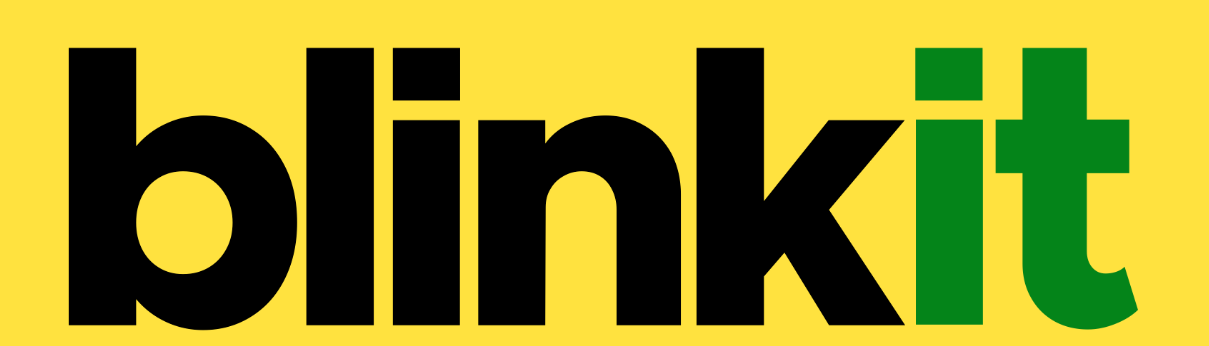

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/blinkit_data.csv')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [ ]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


## **Size of Data**

In [ ]:
print("The Size of data is : ",df.shape)

The Size of data is :  (8523, 12)


In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


##  **Cleaning the Data**

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF' : 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg':'Regular'})

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **KPI's Requirements**

In [ ]:
#Total sales
total_sales = df['Sales'].sum()

# avg sales
avg_sales = df['Sales'].mean()

# No. of Item solds
item_sold = df['Sales'].count()
# average rating
avg_rating = df['Rating'].mean()

print(f"Total Sales is : ${total_sales:,.1f}")
print(f"Average Sales is : ${avg_sales:,.1f}")
print(f"The Total No. of Item Solds is : {item_sold:,.0f}")
print(f"Average Rating is : {avg_rating:,.1f}")

Total Sales is : $1,201,681.5
Average Sales is : $141.0
The Total No. of Item Solds is : 8,523
Average Rating is : 4.0


# **Charts Representation**

### **Total Sales by Fat Content**

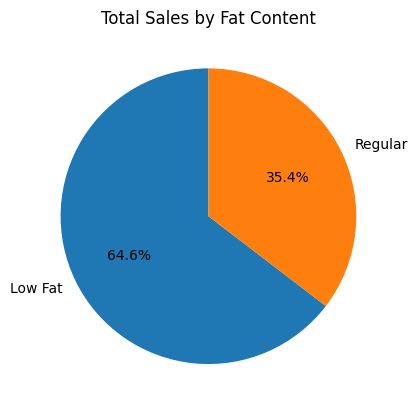

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct='%.1f%%',startangle= 90)
plt.title('Total Sales by Fat Content')
plt.show()

### **Total Sales by Item Type**


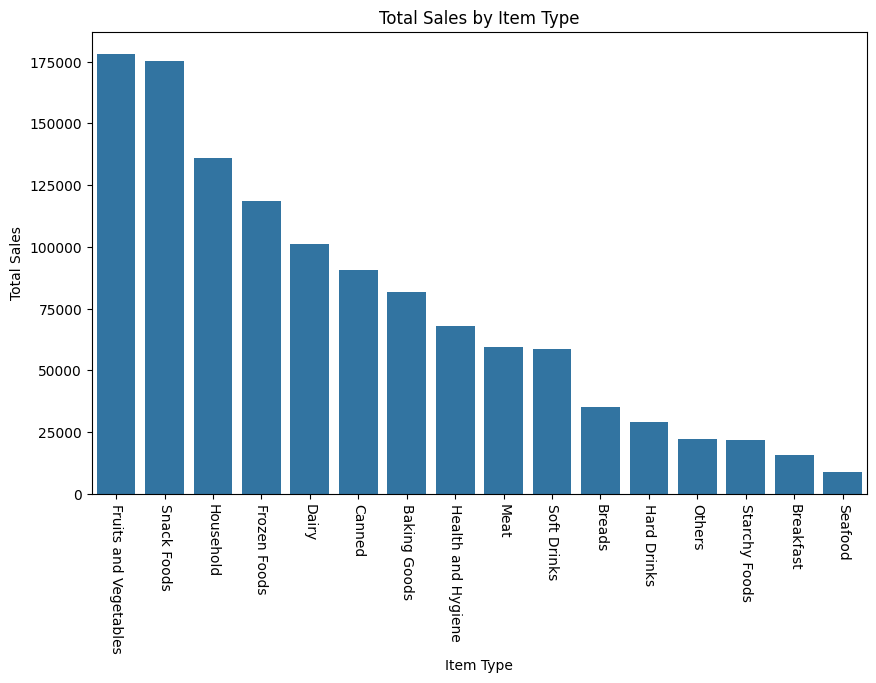

In [ ]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_type.index, y=sales_by_type.values)

plt.xticks(rotation=-90)
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

### **Fat Content by Outlet for Total Sales**

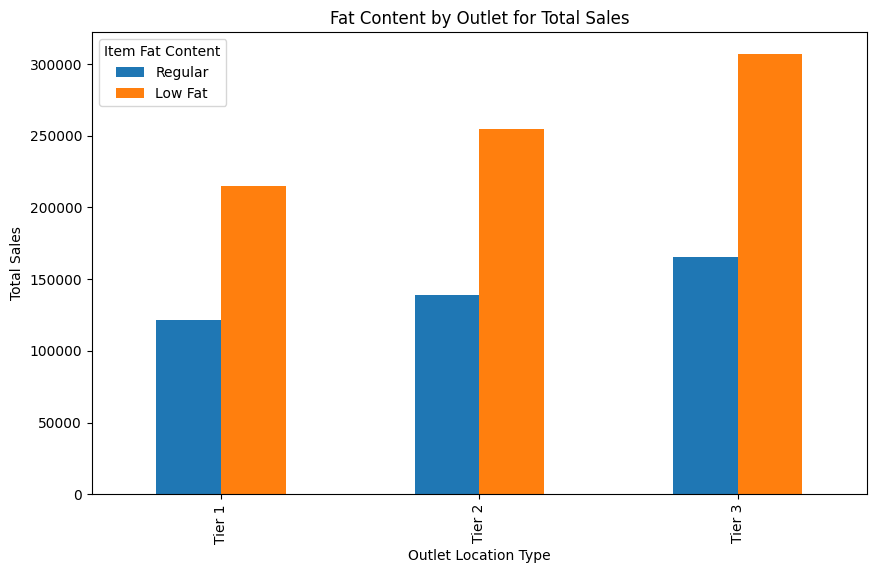

In [ ]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(10,6), title='Fat Content by Outlet for Total Sales')
ax.legend(title='Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Fat Content by Outlet for Total Sales')
plt.show()

### **Total Sales by Outlet Establishment**

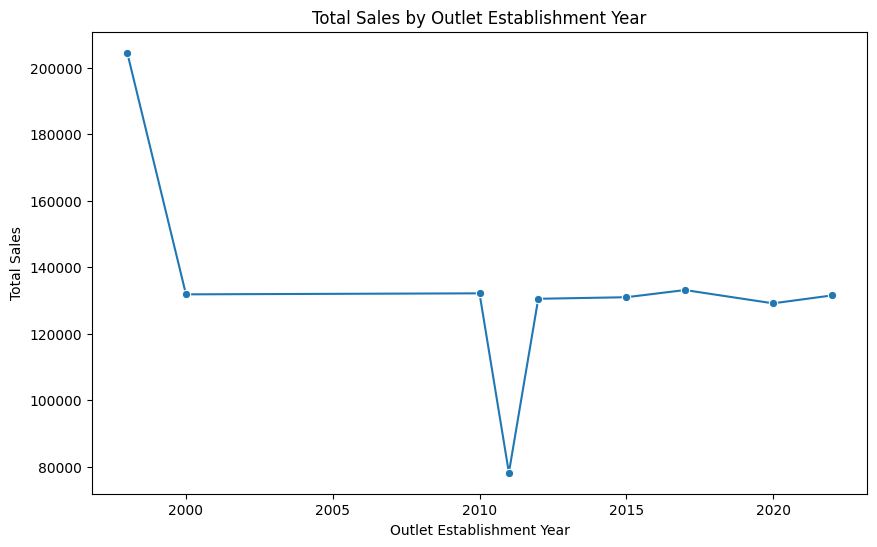

In [ ]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o')

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

### **Sales By Outlet Size**

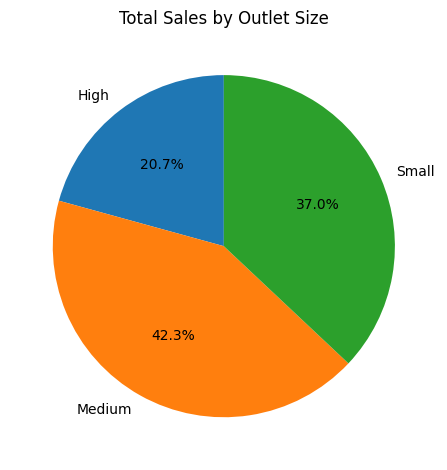

In [ ]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.pie(sales_by_size, labels = sales_by_size.index, autopct='%.1f%%',startangle= 90)
plt.title('Total Sales by Outlet Size')
plt.tight_layout()
plt.show()

### **Sales By Outlet Locations**

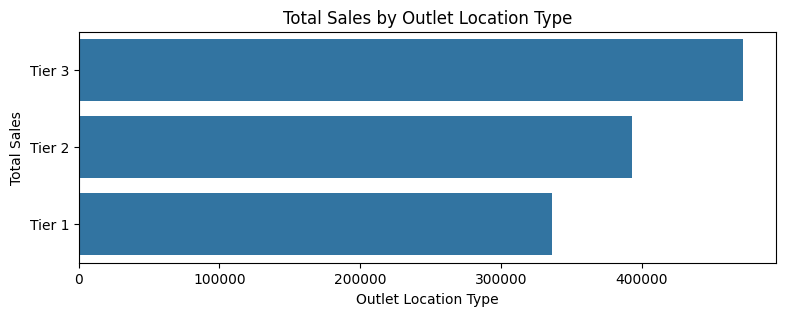

In [ ]:
sales_by_loc = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_loc = sales_by_loc.sort_values('Sales', ascending=False)

plt.figure(figsize=(9,3))
sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_loc)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.show()